In [118]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import io
import requests

В таблице speedreading_data приведены данные по двум группам людей, проходившим данный тест:

Задания 1-5: до обучения, сложность Y1.
Задания 6-10: после обучения, сложность Y2.
Задания 11-15: без обучения, сложность Y3.
Задания 16-20: без обучения, сложность Y4.

Вопросы и задания

В предположении Y1 = Y2, влияет ли обучение на качество восприятия информации?
В предположении Y3 < Y4, влияет ли сложность задания на качество восприятия информации? 
Допустим, что по итогам анализа процедуры проведения теста выяснилось, что Y1 = Y3, Y2 = Y4, Y1 < Y2. Как можно (и можно ли вообще) использовать результаты второй группы (I-P) для корректировки результатов первой группы (A-J)? Обосновать метод корректировки и провести переоценку результатов первого теста. 

# В предположении Y1 = Y2, влияет ли обучение на качество восприятия информации?

In [112]:
data = pd.read_excel("./speedreading_data.xlsx", header=1)

data_Y1 = data.loc[:, 'Задание 1': 'Задание 5']
data_Y2 = data.loc[:, 'Задание 6': 'Задание 10']
data.head(12)

,Unnamed: 0,Задание 1,Задание 2,Задание 3,Задание 4,Задание 5,Задание 6,Задание 7,Задание 8,Задание 9,Задание 10
0,A,4,2,4,4,2,3,1,1,3,2
1,B,5,4,5,3,2,4,2,1,2,2
2,C,5,3,3,2,1,5,4,1,3,3
3,D,5,4,4,2,4,5,4,2,3,2
4,E,5,5,4,3,3,5,3,2,1,1
5,F,5,3,4,1,1,4,5,2,3,2
6,G,5,2,4,3,3,3,3,0,4,3
7,H,5,4,4,3,2,4,2,2,3,3
8,I,5,2,2,2,2,4,3,3,4,3
9,J,5,3,2,4,2,3,4,4,3,2


In [117]:
Y1_agg = data_Y1.mean(axis=1)
Y2_agg = data_Y2.mean(axis=1)
print(Y1_agg.mean(), Y2_agg.mean())
stats.ttest_ind(Y1_agg, Y2_agg)

3.3200000000000003 2.82


Ttest_indResult(statistic=2.28960941577249, pvalue=0.034342258288472705)

p-value равно 0.034, что  меньше 0.05, поэтому мы отрицаем нулевую гипотезу - обучение влияет на усвоение материала. При этом после обучения результат хуже, чем до него

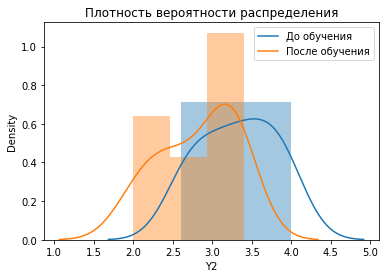

In [97]:
sns.distplot(data['Y1'])
sns.distplot(data['Y2'])
plt.title('Плотность вероятности распределения')
plt.legend(['До обучения', 'После обучения'])
plt.show()

# В предположении Y3 < Y4, влияет ли сложность задания на качество восприятия информации? 

In [114]:
df = pd.read_excel('./speedreading_data.xlsx', sheet_name="Данные по сложности", header=1)
data_Y3 = df.loc[:, 'Задание 11': 'Задание 15']
data_Y4 = df.loc[:, 'Задание 16': 'Задание 20']
df.head(13)

,Unnamed: 0,Задание 11,Задание 12,Задание 13,Задание 14,Задание 15,Задание 16,Задание 17,Задание 18,Задание 19,Задание 20
0,I,5,5,5,3,5,3,3,5,4,3
1,J,5,4,5,4,3,4,5,4,3,3
2,K,4,3,5,5,5,5,4,3,4,2
3,L,5,3,4,4,4,5,4,2,4,2
4,M,5,3,5,5,5,4,4,3,3,5
5,N,5,4,5,3,5,5,5,1,4,4
6,O,5,4,3,3,4,4,2,2,4,4
7,P,5,5,4,5,5,4,5,4,3,3


In [116]:
Y3_agg = data_Y3.mean(axis=1)
Y4_agg = data_Y4.mean(axis=1)
print(Y3_agg.mean(), Y4_agg.mean())
stats.ttest_ind(Y3_agg, Y4_agg)

4.3500000000000005 3.625


Ttest_indResult(statistic=5.092535783364303, pvalue=0.0001639328465121221)

p-value равно 0.00016, что  меньше 0.05 - следовательно, сложность влияет на оценку. При этом чем сложнее задание, тем ниже оценка

# Допустим, что по итогам анализа процедуры проведения теста выяснилось, что Y1 = Y3, Y2 = Y4, Y1 < Y2. Как можно (и можно ли вообще) использовать результаты второй группы (I-P) для корректировки результатов первой группы (A-J)? Обосновать метод корректировки и провести переоценку результатов первого теста. 

In [121]:
stats.ttest_ind(Y1_agg, Y3_agg), stats.ttest_ind(Y2_agg, Y4_agg), stats.ttest_ind(Y1_agg, Y2_agg)

(Ttest_indResult(statistic=-5.121669098980319, pvalue=0.00010247763105821418),
 Ttest_indResult(statistic=-4.250200160286585, pvalue=0.0006109363925016179),
 Ttest_indResult(statistic=2.28960941577249, pvalue=0.034342258288472705))

Даже при условии, что и в первой, и во второй группе участвует часть группы I и J, Использовать результаты не стоит, так как вопросы в заданиях разные.